# **Coordinator Task 1**

Welcome to the first coordinator task bois!!

This time we have a task tailored specifically for you guys, not a house price prediction task, not a cat-dog classification task but something much more interesting!

## **IPL result prediction task!**

Yes, you are right. Predict the *scripted* IPL matches using your ML skills! We have shared the IPL dataset spanning from the year 2008-2021. You are expected to predict the results for the year 2022. 

**Task** : Predict the winner of every match conducted in 2023 based on the dataset that we have shared. The coordinator(s) whose model predicts with highest accuracy will be given a treat.

**Instructions**


*   The coordinator task has two sub-parts: 
 
      1.   EDA (Exploratory Data Analysis)
      2. Data preprocessing
      3.   Model building and training 
 

*   The notebook is designed and categorized accordingly to help you throughout this task
*   For EDA you are expected to use Pandas, Numpy, Matplotlib, Seaborn wherever neccessary. (you are free to use any other Python libraries as well)
*   For the model building, use only linear/logistic regression 
*   You are not allowed to use Pytorch. Build the model from scratch using Numpy


**Note**: We don't expect you to check the 2022 IPL results, be fair and submit your model predictions.

Be as creative as possible, guys; we have given you a raw dataset, as you will have much more scope in exploring the problem statement. Enjoy the task!

# Downloading the dataset

The dataset is a CSV file. First download it onto your local system and upload it on your colab notebook. Use Pandas to open the CSV file and study the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_df = pd.read_csv('/content/IPL_train_ dataset 2008-2021.csv') #the path of the csv file may be different for you change it accordingly

# Data Analysis

Analyze the raw_df. Use Pandas to make observations. Feel free to use Google or Chatgpt for the same. So many functions can be performed using Pandas and remembering them isn't possible. So give the right prompt as you require and use those commands.

The next few cells are left for you guys to experiment

We have coded a few cells to give you an idea.

In [3]:
raw_df.head(10)
test_df = raw_df

In [4]:
raw_df.winner.unique()

array(['RCB', 'Capitals', 'KKR', 'Punjab', 'Mumbai', 'Royals', 'Super',
       'Sunrisers', 'Tied', 'Kings', 'No', 'Daredevils', 'Supergiant',
       'Guj', 'Match', 'Supergiants', 'Warriors', 'Chargers', 'Kochi'],
      dtype=object)

Notice that in the winners column, the team names aren't appropriately mentioned. Lets change them as follows:
replace 

*   RCB with Royal Challengers Bangalore
*   Capitals with Delhi Capitals
*   KKR with Kolkata Knight Riders
*   Punjab with Punjab Kings
*   Mumbai with Mumbai Indians
*   Royals with Rajasthan Royals
*   Super with Chennai Super Kings
*   Sunrisers with Sunrisers Hyderabad
*   Kings with Kings XI Punjab
*   Daredevils with Delhi Daredevils
*   Supergiant with Rising Pune Supergiants
*   Guj with Gujarat Lions
*   Supergiants with Rising Pune Supergiants
*   Warriors with Pune Warriors
*   Chargers with Deccan Chargers
*   Kochi with Kochi Tuskers Kerala












In [5]:
raw_df.replace(to_replace="RCB", value="Royal Challengers Bangalore",inplace=True)
raw_df.replace(to_replace="Capitals", value="Delhi Capitals",inplace=True)
raw_df.replace(to_replace="KKR", value="Kolkata Knight Riders",inplace=True)
raw_df.replace(to_replace="Punjab", value="Punjab Kings",inplace=True)
raw_df.replace(to_replace="Mumbai", value="Mumbai Indians",inplace=True)
raw_df.replace(to_replace="Royals", value="Rajasthan Royals",inplace=True)
raw_df.replace(to_replace="Super", value="Chennai Super Kings",inplace=True)
raw_df.replace(to_replace="Sunrisers", value="Sunrisers Hyderabad",inplace=True)
raw_df.replace(to_replace="Kings", value="Kings XI Punjab",inplace=True)
raw_df.replace(to_replace="Daredevils", value="Delhi Daredevils",inplace=True)
raw_df.replace(to_replace=["Supergiant","Supergiants", "Rising Pune Supergiant"], value="Rising Pune Supergiants",inplace=True) # Also handle "Rising Pune Supergiant"
raw_df.replace(to_replace="Guj", value="Gujarat Lions",inplace=True)
raw_df.replace(to_replace="Warriors", value="Pune Warriors",inplace=True)
raw_df.replace(to_replace="Chargers", value="Deccan Chargers",inplace=True)
raw_df.replace(to_replace="Kochi", value="Kochi Tuskers Kerala",inplace=True)
# Two different names for same stadium
raw_df.replace(to_replace="Zayed Cricket Stadium", value="Sheikh Zayed Stadium",inplace=True)

In [6]:
raw_df.sample(10)

,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
318,2016,Royal Challengers Bangalore,Gujarat Lions,180.0,182.0,Royal Challengers Bangalore,Bat,Gujarat Lions,6 wickets,Virat Kohli,Saurashtra Cricket Association Stadium,Rajkot
408,2015,Chennai Super Kings,Delhi Daredevils,119.0,120.0,Chennai Super Kings,Bat,Delhi Daredevils,6 wickets,Zaheer Khan,Shaheed Veer Narayan Singh International Stadium,Raipur
197,2018,Kolkata Knight Riders,Kings XI Punjab,191.0,126.0,Kings XI Punjab,Field,Kings XI Punjab,9 wickets,KL Rahul,Eden Gardens,Kolkata
644,2011,Mumbai Indians,Kochi Tuskers Kerala,182.0,184.0,Kochi Tuskers Kerala,Field,Kochi Tuskers Kerala,8 wickets,Brendon McCullum,Wankhede Stadium,Mumbai Indians
259,2017,Royal Challengers Bangalore,Gujarat Lions,213.0,192.0,Gujarat Lions,Field,Royal Challengers Bangalore,21 runs,Chris Gayle,Saurashtra Cricket Association Stadium,Rajkot
174,2019,Chennai Super Kings,Kings XI Punjab,170.0,173.0,Kings XI Punjab,Field,Kings XI Punjab,6 wickets,KL Rahul,Punjab Cricket Association IS Bindra Stadium,Mohali
399,2015,Royal Challengers Bangalore,Kings XI Punjab,226.0,88.0,Kings XI Punjab,Field,Royal Challengers Bangalore,138 runs,Chris Gayle,M Chinnaswamy Stadium,Bangalore
724,2010,Rajasthan Royals,Kings XI Punjab,183.0,152.0,Kings XI Punjab,Field,Rajasthan Royals,31 runs,Adam Voges,Punjab Cricket Association Stadium,Mohali
660,2011,Chennai Super Kings,Pune Warriors,142.0,117.0,Pune Warriors,Field,Chennai Super Kings,25 runs,Michael Hussey,MA Chidambaram Stadium,Chepauk
221,2018,Delhi Daredevils,Sunrisers Hyderabad,187.0,191.0,Delhi Daredevils,Bat,Sunrisers Hyderabad,9 wickets,Shikhar Dhawan,Feroz Shah Kotla,Delhi


You can also discard the matches which were tied/abandoned

In [7]:
raw_df.isnull().sum()

year                 0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64

<Axes: >

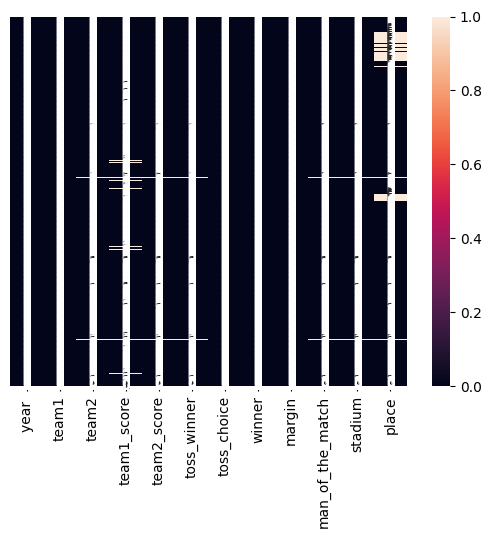

In [8]:
sns.heatmap(raw_df.isnull(), yticklabels=False, annot=True)

#Data Visualization

Use Matplotlib and Seaborn to plot graphs to visualize the dataset. Plot pie charts, histograms, and scatterplots to analyze and present the data understandably.

Take help of this notebook to proceed ahead
https://www.kaggle.com/code/razamh/eda-ipl-dataset

Using the plots answer the following questions:


1.   Number of matches won by each team
2.   Percentage of matches in which first batting and second batting team has won
3.   Number of man of the matches won per player (plot for first 10 players)
4.   Number of matches conducted in each year 
5.   Number of matches in each venue
6.   Number of champions won per team (hint: the last match of every season is the final)
7. Average score of the first batting team in each venue


  We have helped you with the first question, answer the remaining the questions. 





In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
raw_df.winner.unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Mumbai Indians',
       'Rajasthan Royals', 'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Tied', 'Kings XI Punjab', 'No', 'Delhi Daredevils',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Match',
       'Pune Warriors', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

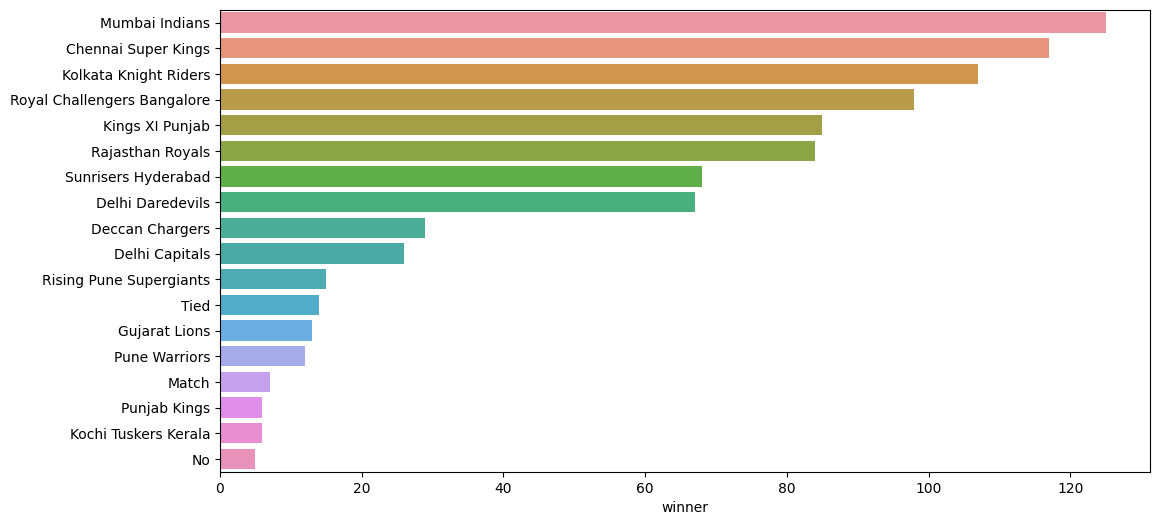

In [11]:
plt.figure(figsize=(12,6))
data = raw_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

Check the above plot, It also has Tied, Match, No on the Y-axis which have to be removed. Plot the above graph again making the changes.

Also clean the data similarly wherever required.

In [12]:
# Dropping null data
print('Before dropping null:', raw_df.isnull().sum(), sep='\n')
raw_df = raw_df.dropna()
print('='*21, 'After dropping null:', raw_df.isnull().sum(), sep='\n')

Before dropping null:
year                 0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64
After dropping null:
year                0
team1               0
team2               0
team1_score         0
team2_score         0
toss_winner         0
toss_choice         0
winner              0
margin              0
man_of_the_match    0
stadium             0
place               0
dtype: int64


In [13]:
def is_valid_winner(x):
  if x in ['Tied', 'Match', 'No']:
    return False
  return True
raw_df = raw_df[raw_df.winner.map(is_valid_winner)]

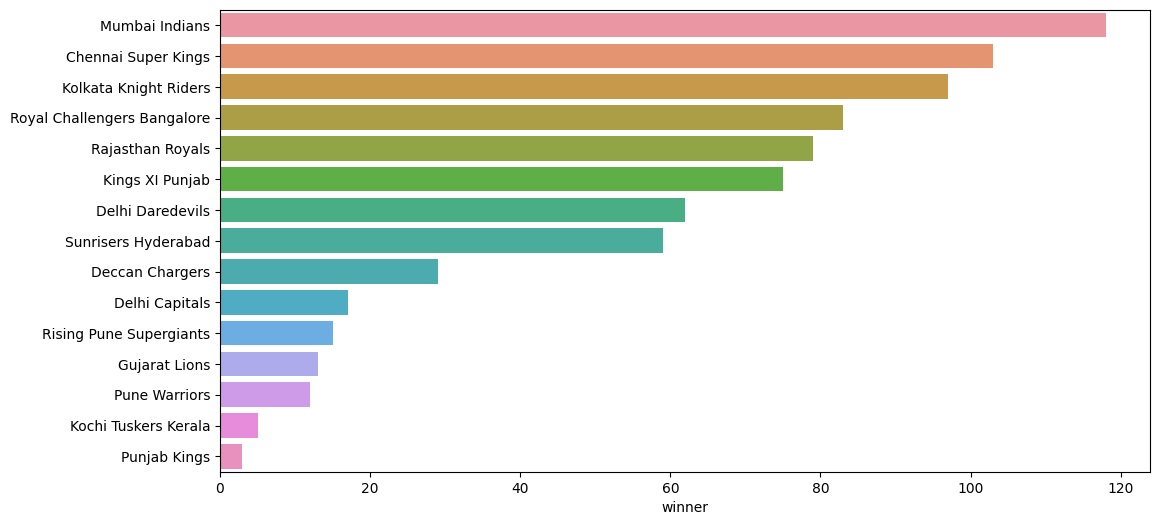

In [14]:
plt.figure(figsize=(12,6))
data = raw_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

#Data Preprocessing

We have to clean the data and preprocess it to convert it into a trainable format.

For that you have to get rid of the NaN values, remove the un-neccesary parameters and also use feature engineering wherever required.

Data preprocessing is essential for the performance of the model, the better parameters you define/retain the better model can learn and hence perform.



We will help you with one team. Suppose lets take RCB. We have to predict the score of RCB using the parameters: team against which it is playing, did it win the toss, stadium, place.

In [15]:
raw_df.drop(columns =['margin','man_of_the_match','winner','place'], axis=1, inplace=True)
print(raw_df.team1.unique())
teams = raw_df.team1.unique()
raw_df

['Mumbai Indians' 'Chennai Super Kings' 'Kolkata Knight Riders'
 'Punjab Kings' 'Royal Challengers Bangalore' 'Delhi Capitals'
 'Rajasthan Royals' 'Sunrisers Hyderabad' 'Kings XI Punjab'
 'Delhi Daredevils' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']


,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,stadium
0,2021,Mumbai Indians,Royal Challengers Bangalore,159.0,160.0,Royal Challengers Bangalore,Field,MA Chidambaram Stadium
1,2021,Chennai Super Kings,Delhi Capitals,188.0,190.0,Delhi Capitals,Field,Wankhede Stadium
2,2021,Kolkata Knight Riders,Sunrisers Hyderabad,187.0,177.0,Sunrisers Hyderabad,Field,MA Chidambaram Stadium
3,2021,Punjab Kings,Rajasthan Royals,221.0,217.0,Rajasthan Royals,Field,Wankhede Stadium
4,2021,Mumbai Indians,Kolkata Knight Riders,152.0,142.0,Kolkata Knight Riders,Field,MA Chidambaram Stadium
...,...,...,...,...,...,...,...,...
878,2008,Deccan Chargers,Chennai Super Kings,147.0,148.0,Deccan Chargers,Bat,Rajiv Gandhi International Stadium
880,2008,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Punjab Cricket Association Stadium
881,2008,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Wankhede Stadium
882,2008,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Wankhede Stadium


In [16]:
# Normalize years
eps = 1e-8
years = raw_df['year ']
mean_year = np.mean(years)
var_year = np.var(years)
years -= mean_year
years /= np.sqrt(var_year + eps)
print(np.mean(years), np.var(years))
raw_df['year '] = years

-2.576409504210649e-14 0.9999999992966786


In [17]:
team_dfs = {}
for team in teams:
  team_dfs[team] = raw_df.loc[((raw_df['team1'] == team) | (raw_df['team2'] == team))]
  team_dfs[team].reset_index(inplace = True)

In [18]:
team_dfs['Pune Warriors'].head(10)

,index,year,team1,team2,team1_score,team2_score,toss_winner,toss_choice,stadium
0,482,-0.255903,Sunrisers Hyderabad,Pune Warriors,126.0,104.0,Pune Warriors,Field,Rajiv Gandhi International Stadium
1,485,-0.255903,Pune Warriors,Kings XI Punjab,99.0,100.0,Pune Warriors,Bat,Subrata Roy Sahara Stadium
2,492,-0.255903,Rajasthan Royals,Pune Warriors,145.0,148.0,Rajasthan Royals,Bat,Subrata Roy Sahara Stadium
3,494,-0.255903,Mumbai Indians,Pune Warriors,183.0,142.0,Mumbai Indians,Bat,Wankhede Stadium
4,498,-0.255903,Pune Warriors,Chennai Super Kings,159.0,135.0,Pune Warriors,Bat,MA Chidambaram Stadium
5,501,-0.255903,Sunrisers Hyderabad,Pune Warriors,119.0,108.0,Pune Warriors,Field,Subrata Roy Sahara Stadium
6,508,-0.255903,Pune Warriors,Kings XI Punjab,185.0,186.0,Kings XI Punjab,Field,Punjab Cricket Association Stadium
7,510,-0.255903,Royal Challengers Bangalore,Pune Warriors,263.0,133.0,Pune Warriors,Field,M Chinnaswamy Stadium
8,518,-0.255903,Delhi Daredevils,Pune Warriors,164.0,149.0,Pune Warriors,Field,Shaheed Veer Narayan Singh International Stadium
9,521,-0.255903,Chennai Super Kings,Pune Warriors,164.0,127.0,Chennai Super Kings,Bat,Subrata Roy Sahara Stadium


In [19]:
# team_score = []
# for i in range(len(RCB_df)):
#   if RCB_df['team1'].values[i] == 'Royal Challengers Bangalore':
#     team_score.append(RCB_df['team1_score'].values[i])
#   else:
#     team_score.append(RCB_df['team2_score'].values[i])

for team in teams:
  data_entries = len(team_dfs[team])
  team_score = []
  for i in range(data_entries):
    if team_dfs[team]['team1'].values[i] == team:
      team_score.append(team_dfs[team]['team1_score'].values[i])
    else:
      team_score.append(team_dfs[team]['team2_score'].values[i])
  team_dfs[team].drop(columns =['team1_score','team2_score','index'], axis=1, inplace=True)
  team_dfs[team]['team_score'] = team_score
team_dfs['Pune Warriors']

<ipython-input-19-1af7ebff75e8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team].drop(columns =['team1_score','team2_score','index'], axis=1, inplace=True)
<ipython-input-19-1af7ebff75e8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team]['team_score'] = team_score
<ipython-input-19-1af7ebff75e8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team

,year,team1,team2,toss_winner,toss_choice,stadium,team_score
0,-0.255903,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,Field,Rajiv Gandhi International Stadium,104.0
1,-0.255903,Pune Warriors,Kings XI Punjab,Pune Warriors,Bat,Subrata Roy Sahara Stadium,99.0
2,-0.255903,Rajasthan Royals,Pune Warriors,Rajasthan Royals,Bat,Subrata Roy Sahara Stadium,148.0
3,-0.255903,Mumbai Indians,Pune Warriors,Mumbai Indians,Bat,Wankhede Stadium,142.0
4,-0.255903,Pune Warriors,Chennai Super Kings,Pune Warriors,Bat,MA Chidambaram Stadium,159.0
5,-0.255903,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,Field,Subrata Roy Sahara Stadium,108.0
6,-0.255903,Pune Warriors,Kings XI Punjab,Kings XI Punjab,Field,Punjab Cricket Association Stadium,185.0
7,-0.255903,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,Field,M Chinnaswamy Stadium,133.0
8,-0.255903,Delhi Daredevils,Pune Warriors,Pune Warriors,Field,Shaheed Veer Narayan Singh International Stadium,149.0
9,-0.255903,Chennai Super Kings,Pune Warriors,Chennai Super Kings,Bat,Subrata Roy Sahara Stadium,127.0


Now we got the team score of RCB in all of its matches. This will be our target dataset.

In [20]:
# team_score

In [21]:
# RCB_df.drop(columns =['team1_score','team2_score','index'], axis=1, inplace=True)

In [22]:
# RCB_df
team_dfs['Pune Warriors']

,year,team1,team2,toss_winner,toss_choice,stadium,team_score
0,-0.255903,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,Field,Rajiv Gandhi International Stadium,104.0
1,-0.255903,Pune Warriors,Kings XI Punjab,Pune Warriors,Bat,Subrata Roy Sahara Stadium,99.0
2,-0.255903,Rajasthan Royals,Pune Warriors,Rajasthan Royals,Bat,Subrata Roy Sahara Stadium,148.0
3,-0.255903,Mumbai Indians,Pune Warriors,Mumbai Indians,Bat,Wankhede Stadium,142.0
4,-0.255903,Pune Warriors,Chennai Super Kings,Pune Warriors,Bat,MA Chidambaram Stadium,159.0
5,-0.255903,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,Field,Subrata Roy Sahara Stadium,108.0
6,-0.255903,Pune Warriors,Kings XI Punjab,Kings XI Punjab,Field,Punjab Cricket Association Stadium,185.0
7,-0.255903,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,Field,M Chinnaswamy Stadium,133.0
8,-0.255903,Delhi Daredevils,Pune Warriors,Pune Warriors,Field,Shaheed Veer Narayan Singh International Stadium,149.0
9,-0.255903,Chennai Super Kings,Pune Warriors,Chennai Super Kings,Bat,Subrata Roy Sahara Stadium,127.0


Encoding the toss winner column. If RCB won the toss then 1 else 0

In [23]:
for team in teams:
  for i in range(len(team_dfs[team])):
    if team_dfs[team]['toss_winner'].values[i] == team:
      team_dfs[team]['toss_winner'].values[i] = 1
    else:
      team_dfs[team]['toss_winner'].values[i] = 0

In [24]:
team_dfs['Pune Warriors']

,year,team1,team2,toss_winner,toss_choice,stadium,team_score
0,-0.255903,Sunrisers Hyderabad,Pune Warriors,1,Field,Rajiv Gandhi International Stadium,104.0
1,-0.255903,Pune Warriors,Kings XI Punjab,1,Bat,Subrata Roy Sahara Stadium,99.0
2,-0.255903,Rajasthan Royals,Pune Warriors,0,Bat,Subrata Roy Sahara Stadium,148.0
3,-0.255903,Mumbai Indians,Pune Warriors,0,Bat,Wankhede Stadium,142.0
4,-0.255903,Pune Warriors,Chennai Super Kings,1,Bat,MA Chidambaram Stadium,159.0
5,-0.255903,Sunrisers Hyderabad,Pune Warriors,1,Field,Subrata Roy Sahara Stadium,108.0
6,-0.255903,Pune Warriors,Kings XI Punjab,0,Field,Punjab Cricket Association Stadium,185.0
7,-0.255903,Royal Challengers Bangalore,Pune Warriors,1,Field,M Chinnaswamy Stadium,133.0
8,-0.255903,Delhi Daredevils,Pune Warriors,1,Field,Shaheed Veer Narayan Singh International Stadium,149.0
9,-0.255903,Chennai Super Kings,Pune Warriors,0,Bat,Subrata Roy Sahara Stadium,127.0


In [25]:
for team in teams:
  opponent_team = []
  for i in range(len(team_dfs[team])):
    if team_dfs[team]['team1'].values[i] != team:
      opponent_team.append(team_dfs[team]['team1'].values[i])
    else:
      opponent_team.append(team_dfs[team]['team2'].values[i])
  team_dfs[team]['Opponent_Team'] = opponent_team
  # team_dfs[team]['team_score'] = team_score
  team_dfs[team].drop(columns =['team1','team2'], axis=1, inplace=True)

<ipython-input-25-609397457134>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team]['Opponent_Team'] = opponent_team
<ipython-input-25-609397457134>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team].drop(columns =['team1','team2'], axis=1, inplace=True)
<ipython-input-25-609397457134>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [26]:
# RCB_df['Opponent_Team'] = opponent_team

In [27]:
# RCB_df.drop(columns =['team1','team2'], axis=1, inplace=True)

In [28]:
# RCB_df
team_dfs['Pune Warriors']

,year,toss_winner,toss_choice,stadium,team_score,Opponent_Team
0,-0.255903,1,Field,Rajiv Gandhi International Stadium,104.0,Sunrisers Hyderabad
1,-0.255903,1,Bat,Subrata Roy Sahara Stadium,99.0,Kings XI Punjab
2,-0.255903,0,Bat,Subrata Roy Sahara Stadium,148.0,Rajasthan Royals
3,-0.255903,0,Bat,Wankhede Stadium,142.0,Mumbai Indians
4,-0.255903,1,Bat,MA Chidambaram Stadium,159.0,Chennai Super Kings
5,-0.255903,1,Field,Subrata Roy Sahara Stadium,108.0,Sunrisers Hyderabad
6,-0.255903,0,Field,Punjab Cricket Association Stadium,185.0,Kings XI Punjab
7,-0.255903,1,Field,M Chinnaswamy Stadium,133.0,Royal Challengers Bangalore
8,-0.255903,1,Field,Shaheed Veer Narayan Singh International Stadium,149.0,Delhi Daredevils
9,-0.255903,0,Bat,Subrata Roy Sahara Stadium,127.0,Chennai Super Kings


In [29]:
for stadium in raw_df.stadium.unique():
  print(stadium)


MA Chidambaram Stadium
Wankhede Stadium
Narendra Modi Stadium
Arun Jaitley Stadium
Sheikh Zayed Stadium
Eden Gardens
Sawai Mansingh Stadium
Feroz Shah Kotla
M Chinnaswamy Stadium
Rajiv Gandhi International Stadium
Punjab Cricket Association IS Bindra Stadium
Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium
Maharashtra Cricket Association Stadium
Holkar Cricket Stadium
Saurashtra Cricket Association Stadium
Green Park
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Shaheed Veer Narayan Singh International Stadium
Sardar Patel Stadium
Punjab Cricket Association Stadium
Brabourne Stadium
JSCA International Stadium Complex
Barabati Stadium
Subrata Roy Sahara Stadium
Himachal Pradesh Cricket Association Stadium
Nehru Stadium
Dr DY Patil Sports Academy
Vidarbha Cricket Association Stadium
Newlands
St George's Park
Kingsmead
SuperSport Park
Buffalo Park
New Wanderers Stadium
De Beers Diamond Oval
OUTsurance Oval


In [30]:
# Encoding toss choice
print(team_dfs['Pune Warriors'].toss_choice.unique())
for team in teams:
  toss_choices = []
  for i in range(len(team_dfs[team])):
    if team_dfs[team]['toss_choice'].values[i] == 'Bat':
      toss_choices.append(team_dfs[team]['toss_winner'].values[i])
    else:
      toss_choices.append(0 if team_dfs[team]['toss_winner'].values[i] == 1 else 1)
  team_dfs[team].toss_choice = toss_choices
team_dfs['Pune Warriors'].toss_choice.unique()

['Field' 'Bat']


<ipython-input-30-f481228b460a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team].toss_choice = toss_choices


array([0, 1])

Similarly encode the other columns. Machine Learning models don't understand words/text so you have to encode the text to numbers.

Check different techniques of encoding: one-hot encoding and number encoding and use either one to encode the columns: toss_choice, opponent team and stadium

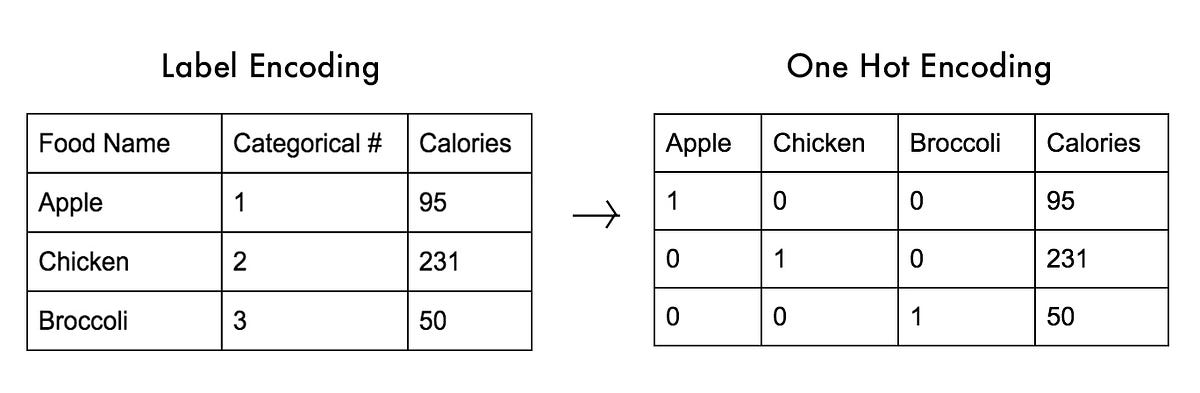

Now it's time for you to take up! All the best 

Prepare similar data frames for other teams. Predict the scores of the team based on the parameters.

Suppose say you have to predict who will win RCB vs CSK, predict the score of RCB considering CSK as opponent. Then predict score of CSK with RCB as opponent. Then compare both scores, whoever scores higher will be the winner of the match.




In [31]:
team_dfs['Pune Warriors']

,year,toss_winner,toss_choice,stadium,team_score,Opponent_Team
0,-0.255903,1,0,Rajiv Gandhi International Stadium,104.0,Sunrisers Hyderabad
1,-0.255903,1,1,Subrata Roy Sahara Stadium,99.0,Kings XI Punjab
2,-0.255903,0,0,Subrata Roy Sahara Stadium,148.0,Rajasthan Royals
3,-0.255903,0,0,Wankhede Stadium,142.0,Mumbai Indians
4,-0.255903,1,1,MA Chidambaram Stadium,159.0,Chennai Super Kings
5,-0.255903,1,0,Subrata Roy Sahara Stadium,108.0,Sunrisers Hyderabad
6,-0.255903,0,1,Punjab Cricket Association Stadium,185.0,Kings XI Punjab
7,-0.255903,1,0,M Chinnaswamy Stadium,133.0,Royal Challengers Bangalore
8,-0.255903,1,0,Shaheed Veer Narayan Singh International Stadium,149.0,Delhi Daredevils
9,-0.255903,0,0,Subrata Roy Sahara Stadium,127.0,Chennai Super Kings


In [32]:
def team_encode(team_name):
  return_value = [1 if team == team_name else 0 for team in teams]
  if 1 not in return_value:
    print(str(team_name),str(type(team_name)))
    raise "No matches found in Team Encoding: "
  return return_value

for team in teams:
  team_dfs[team].drop(columns=['stadium'], axis=1, inplace=True)

<ipython-input-32-d50fcde83eca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team].drop(columns=['stadium'], axis=1, inplace=True)
<ipython-input-32-d50fcde83eca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team].drop(columns=['stadium'], axis=1, inplace=True)
<ipython-input-32-d50fcde83eca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team].drop(columns=['stadium'], axis=1, inplace=True)
<ipytho

In [33]:
teams

array(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Punjab Kings', 'Royal Challengers Bangalore', 'Delhi Capitals',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Delhi Daredevils', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Pune Warriors', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

In [34]:
team_encode('Mumbai Indians'), team_encode('Pune Warriors')

([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [35]:
# team_dfs['Pune Warriors'].Opponent_Team = team_dfs['Pune Warriors'].Opponent_Team.map(team_encode)
# team_dfs['Pune Warriors']
for team in teams:
  team_dfs[team].Opponent_Team = team_dfs[team].Opponent_Team.map(team_encode)
team_dfs['Pune Warriors']



<ipython-input-35-6000a3ea857a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dfs[team].Opponent_Team = team_dfs[team].Opponent_Team.map(team_encode)


,year,toss_winner,toss_choice,team_score,Opponent_Team
0,-0.255903,1,0,104.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
1,-0.255903,1,1,99.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
2,-0.255903,0,0,148.0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,-0.255903,0,0,142.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,-0.255903,1,1,159.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,-0.255903,1,0,108.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
6,-0.255903,0,1,185.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
7,-0.255903,1,0,133.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8,-0.255903,1,0,149.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
9,-0.255903,0,0,127.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


#Model building and training

The dataset given is only for training. After training your model a testing dataset will be shared on which your model is expected to predict outputs.

The task is to predict the winners of the matches given the two teams, venue, and toss_winner. Accordingly, you have to decide the parameters to be taken into consideration for training the model.

The training dataset is IPL dataset for 2008-2021. A general practice while Training is splitting your dataset into training and validation datasets.

You can use only numpy, build a linear/logistic regression from scratch and train it. 

An idea to get started is to fit a linear regressor to predict the score of both the teams and the team with greater score will win.

You can come up with any other idea as well.

For reference check this article https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

Another reference article which you guys can look into:


https://www.analyticsvidhya.com/blog/2021/10/building-an-ipl-score-predictor-end-to-end-ml-project/

In [36]:
team_dfs['Pune Warriors'].keys()

Index(['year ', 'toss_winner', 'toss_choice', 'team_score', 'Opponent_Team'], dtype='object')

In [37]:
def parse_data(team, index, dataframes):
  df = dataframes[team]
  data = []
  data.append(df['year '].values[index])
  data.append(df['toss_winner'].values[index])
  data.append(df['toss_choice'].values[index])
  # for i in df['stadium'].values[index]: data.append(i)
  for i in df['Opponent_Team'].values[index]: data.append(i)
  return data, df['team_score'].values[index]
print(parse_data('Pune Warriors', 0, team_dfs))
team_dfs['Pune Warriors'].head(1)

([-0.2559027780351794, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 104.0)


,year,toss_winner,toss_choice,team_score,Opponent_Team
0,-0.255903,1,0,104.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"


In [38]:
# Each team has different weights and biases
epochs = 10000
lr = 0.01
training_dens = 0.8

weights, biases = {}, {}
for team in teams:
  weights[team] = np.random.random(size=len(parse_data(team, 0, team_dfs)[0]))
  biases[team] = np.random.random()

In [39]:
# Training and validation dataframes
training_dfs, valid_dfs = {}, {}
for team in teams:
  training_dfs[team] = team_dfs[team].sample(frac=training_dens)
  valid_dfs[team] = team_dfs[team].drop(training_dfs[team].index)
  training_dfs[team].reset_index(inplace = True)
  valid_dfs[team].reset_index(inplace = True)
training_dfs['Pune Warriors']

,index,year,toss_winner,toss_choice,team_score,Opponent_Team
0,10,-0.255903,0,0,170.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,40,-0.786307,1,0,139.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,2,-0.255903,0,0,148.0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,42,-0.786307,0,0,137.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
4,16,-0.521105,0,1,129.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,7,-0.255903,1,0,133.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,30,-0.521105,0,0,125.0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
7,6,-0.255903,0,1,185.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
8,12,-0.255903,0,0,106.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9,13,-0.255903,1,1,112.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
team_train_loss, team_valid_loss = {}, {}
for team in teams:
  print('\rTraining team: ', team)
  training_losses, valid_losses = [], []
  for epoch in range(epochs):
    training_loss = 0
    idxlist = [i for i in range(len(training_dfs[team]))]
    np.random.shuffle(idxlist)
    dweight, dbias = np.zeros(len(weights[team])), 0
    for idx in idxlist:
      data, target = parse_data(team, idx, training_dfs)
      data = np.array(data)

      prediction = np.dot(data, weights[team]) + biases[team]

      loss = (prediction - target) ** 2
      training_loss += loss

      dweight -= lr * (prediction - target) * data
      dbias -= lr * (prediction - target)
    # Length independence
    training_loss /= len(idxlist)
    dweight /= len(idxlist)
    dbias /= len(idxlist)
    training_losses.append(training_loss)
    weights[team] += dweight
    # print(dweight[0] / weights[team][0])
    biases[team] += dbias
    
    valid_loss = 0
    idxlist = [i for i in range(len(valid_dfs[team]))]
    np.random.shuffle(idxlist)
    dweight, dbias = np.zeros(len(weights[team])), 0
    for idx in idxlist:
      data, target = parse_data(team, idx, valid_dfs)
      data = np.array(data)

      prediction = np.dot(data, weights[team]) + biases[team]

      loss = (prediction - target) ** 2
      valid_loss += loss
    # Length independence
    training_loss /= len(idxlist)
    valid_losses.append(valid_loss)
    if (epoch+1) % 20 == 0: print('\r', (epoch+1),'/' ,epochs, end='')
  team_train_loss[team] = training_losses
  team_valid_loss[team] = valid_losses

Training team:  Mumbai Indians
Training team:  Chennai Super Kings
Training team:  Kolkata Knight Riders
Training team:  Punjab Kings
Training team:  Royal Challengers Bangalore
Training team:  Delhi Capitals
Training team:  Rajasthan Royals
Training team:  Sunrisers Hyderabad
Training team:  Kings XI Punjab
Training team:  Delhi Daredevils
Training team:  Gujarat Lions
Training team:  Rising Pune Supergiants
Training team:  Pune Warriors
 3820 / 10000

In [ ]:
for team in teams:
  plt.plot(team_train_loss[team], label=team)
plt.title('Team Training Loss')
plt.legend()
plt.show()

In [ ]:
for team in teams:
  plt.plot(team_valid_loss[team], label=team)
plt.title('Team validation Loss')
plt.legend()
plt.show()

In [ ]:
print('Final Train Losses')
for team in teams:
  print(team, ':', team_train_loss[team][-1])

In [ ]:
# eps = 1e-8
# years = raw_df['year ']
# mean_year = np.mean(years)
# var_year = np.var(years)
# years -= mean_year
# years /= np.sqrt(var_year + eps)
# print(np.mean(years), np.var(years))
# raw_df['year '] = years
def parse_year(year):
  year -= mean_year
  year /= np.sqrt(var_year + eps)
  return year

print('2022', parse_year(2022))

def expected_score(team, year, toss_winner, toss_choice, opponent):
  data = []
  data.append(parse_year(year))
  data.append(toss_winner)
  data.append(toss_choice)
  for i in team_encode(opponent): data.append(i)
  return np.dot(data, weights[team]) + biases[team]

In [ ]:
for team in teams: print(team)

In [ ]:
expected_score('Mumbai Indians', 2022, 1, 1, 'Royal Challengers Bangalore')

In [ ]:
expected_score('Royal Challengers Bangalore', 2022, 0, 0, 'Mumbai Indians')

In [ ]:
def predict_match(year, team1, team2):
  team1_runs = []
  team2_runs = []
  for coin in [0,1]:
    ncoin = 1 if coin == 0 else 0
    for choice in [0,1]:
      nchoice = 1 if choice == 0 else 0
      team1_runs.append(expected_score(team1, year, coin, choice, team2))
      team2_runs.append(expected_score(team2, year, ncoin, nchoice, team1))
  team1_exp = np.average(team1_runs)
  team2_exp = np.average(team2_runs)
  if team1_exp > team2_exp:
    return team1, team2, team1_runs, team2_runs, team1_exp, team2_exp
  else:
    return team2, team1, team2_runs, team1_runs, team2_exp, team1_exp

In [ ]:
predict_match(2022, 'Royal Challengers Bangalore', 'Mumbai Indians')

In [ ]:
test_df.dropna(inplace = True)
test_df = test_df.sample(frac=0.2)

In [ ]:
test_df.drop(columns=['team1_score', 'team2_score', 'toss_winner', 'toss_choice', 'stadium'], axis=1, inplace=True)
test_df.replace(to_replace="RCB", value="Royal Challengers Bangalore",inplace=True)
test_df.replace(to_replace="Capitals", value="Delhi Capitals",inplace=True)
test_df.replace(to_replace="KKR", value="Kolkata Knight Riders",inplace=True)
test_df.replace(to_replace="Punjab", value="Punjab Kings",inplace=True)
test_df.replace(to_replace="Mumbai", value="Mumbai Indians",inplace=True)
test_df.replace(to_replace="Royals", value="Rajasthan Royals",inplace=True)
test_df.replace(to_replace="Super", value="Chennai Super Kings",inplace=True)
test_df.replace(to_replace="Sunrisers", value="Sunrisers Hyderabad",inplace=True)
test_df.replace(to_replace="Kings", value="Kings XI Punjab",inplace=True)
test_df.replace(to_replace="Daredevils", value="Delhi Daredevils",inplace=True)
test_df.replace(to_replace=["Supergiant","Supergiants", "Rising Pune Supergiant"], value="Rising Pune Supergiants",inplace=True) # Also handle "Rising Pune Supergiant"
test_df.replace(to_replace="Guj", value="Gujarat Lions",inplace=True)
test_df.replace(to_replace="Warriors", value="Pune Warriors",inplace=True)
test_df.replace(to_replace="Chargers", value="Deccan Chargers",inplace=True)
test_df.replace(to_replace="Kochi", value="Kochi Tuskers Kerala",inplace=True)
# Two different names for same stadium
test_df.replace(to_replace="Zayed Cricket Stadium", value="Sheikh Zayed Stadium",inplace=True)

In [ ]:
test_df.drop(columns=['margin', 'man_of_the_match', 'place'], axis=1, inplace = True)
test_df

In [ ]:
test_df.reset_index(inplace = True)
test_df

In [ ]:
hit = 0
for i in range(len(test_df)):
  prediction = predict_match(test_df['year '].values[i], test_df['team1'].values[i], test_df['team2'].values[i])[0]
  if prediction == test_df['winner'].values[i]:
    hit += 1
print('Accuracy: ', hit/len(test_df))

In [ ]:
for team1 in test_df["team1"]:
  if team1 not in teams: print(team1)

In [ ]:
teams

In [ ]:
sub_df = pd.read_csv('/content/submission_csv.csv')

In [ ]:
sub_df.head(10)

In [ ]:
for team in sub_df.team1.unique():
  if team not in teams:
    print(team)

In [ ]:
for team in sub_df.team2.unique():
  if team not in teams:
    print(team)

In [ ]:
sub_df.isnull().sum()

In [ ]:
sub_df.keys()

In [ ]:
for i in range(len(sub_df)):
  team1 = sub_df['team1'].values[i]
  team2 = sub_df['team2'].values[i]
  winner = predict_match(2022, team1, team2)[0]
  if winner == team1:
    sub_df['prediction '].values[i] = 1
  else:
    sub_df['prediction '].values[i] = 2

In [ ]:
sub_df.sample(20)

In [ ]:
sub_df.to_csv('./submission_gandhar.csv', index=False)